In [4]:
import numpy as np

x = np.array([[1, 2], [3, 4]])
print(x)

[[1 2]
 [3 4]]


In [5]:
from scipy import sparse

# Создаем 2D массив numpy с единицами по главной диагонали и нулями в остальных ячейках
eye = np.eye(4) # Матрица 4 на 4
print(eye)

# Преобразовываем массив numpy в разреженную матрицу scipy в формате CSR
# Сохраняем лишь ненулевые элементы. Кортеж с позицией элемента в матрице (0, 0) и справа сами элементы
sparse_matrix = sparse.csr_matrix(eye)
print(sparse_matrix)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [6]:
data = np.ones(4) # Массив из 4-х элементов, состоящий из единиц
row_indices = np.arange(4)
col_indices = np.arange(4)
# COO (coordinate format) – координатный формат хранения разреженных матриц: хранятся только ненулевые элементы матрицы и их координаты (номера строк и столбцов)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print(eye_coo)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


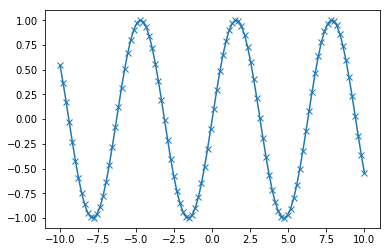

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# Генерируем последовательность чисел от -10 до 10 с шагом 100, длина последовательности будет равна шагу, в этом случае 100
x = np.linspace(-10, 10, 100)
# Создаем второй массив с помощью синуса. К каждому элементу массива применится функция sin()
y = np.sin(x)
# Функция создает линейный график на основе двух массивов 
plt.plot(x, y, marker="x")

In [8]:
import pandas as pd

# создаем простой набор данных с характеристиками пользователей

data = {
    'Name': ["John", "Anna", "Peter", "Linda"], 
    'Location' : ["New York", "Paris", "Berlin", "London"], 
    'Age' : [24, 13, 53, 33] 
}

data_pandas = pd.DataFrame(data)
# IPython.display позволяет "красиво напечатать" датафреймы в Jupyter notebook 
display(data_pandas)
# Выбрать все строки, в которых значение столбца age больше 30 
display(data_pandas[data_pandas.Age > 30]) 

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [9]:
# from IPython.display import display 
# Если скрипт запускать через консоль, так же plt.show()

# Если есть проблемы с выводом кириллицы
# plt.rc('font', family='Verdana')

In [10]:
import sklearn

data_iris = sklearn.datasets.load_iris() # Возращает объект Bunch, который похож на dict,
# за исключением возможности обращаться к ключам словарь как к атрибутам объекта, data_iris.data - через точку
print(data_iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( 
    data_iris['data'], data_iris['target'], random_state=0)

c:\users\admin\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  import sys


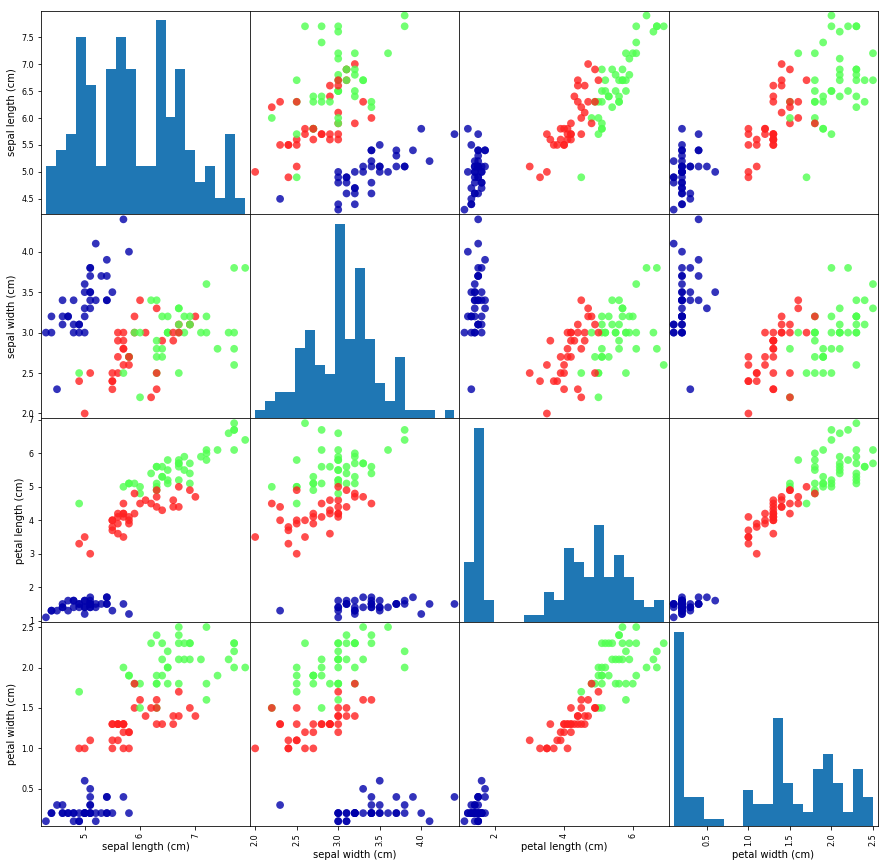

In [12]:
import mglearn

# создаем dataframe из данных в массиве X_train 
# маркируем столбцы, используя строки в data_iris.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=data_iris.feature_names)
# создаем матрицу рассеяния из dataframe, цвет точек задаем с помощью y_train 
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [13]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [14]:
X_new = np.array([[5, 2.9, 1, 0.2]]) 
print(X_new.shape)

(1, 4)


In [15]:
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction)) 
print("Спрогнозированная метка: {}".format( 
       data_iris['target_names'][prediction]))

Прогноз: [0]
Спрогнозированная метка: ['setosa']


In [40]:
y_pred = knn.predict(X_test) 
print("Прогнозы для тестового набора:\n {}".format(y_pred))

Прогнозы для тестового набора:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [41]:
print("Правильность на тестовом наборе (np.mean()): {:.2f}".format(np.mean(y_pred == y_test)))
print("Правильность на тестовом наборе (KNeighborsClassifier.score()): {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе (np.mean()): 0.97
Правильность на тестовом наборе (KNeighborsClassifier.score()): 0.97


форма массива X: (26, 2)


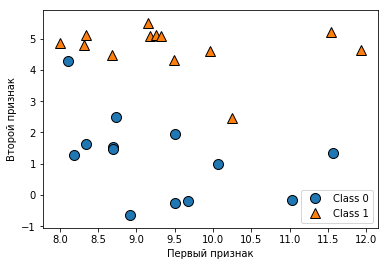

In [46]:
# Генерируем набор данных
X, y = mglearn.datasets.make_forge()
# Строим график для набора данных
%matplotlib inline
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel("Первый признак") 
plt.ylabel("Второй признак") 
print("форма массива X:", X.shape)

Text(0,0.5,'Целевая переменная')

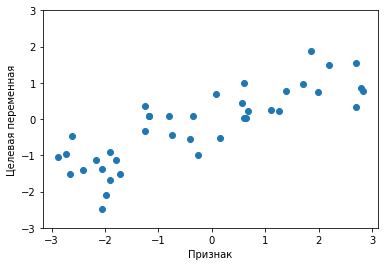

In [47]:
X, y = mglearn.datasets.make_wave(n_samples=40) 
plt.plot(X, y, 'o') 
plt.ylim(-3, 3) 
plt.xlabel("Признак") 
plt.ylabel("Целевая переменная") 

In [62]:
from sklearn.datasets import load_breast_cancer 

cancer = load_breast_cancer() 

print("Ключи cancer(): \n", cancer.keys()) 
print("\nФорма массива data для набора cancer:", cancer.data.shape)
print("\nКоличество примеров для каждого класса:\n", 
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
print("\nИмена признаков:\n", cancer.feature_names) 

Ключи cancer(): 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Форма массива data для набора cancer: (569, 30)

Количество примеров для каждого класса:
 {'malignant': 212, 'benign': 357}

Имена признаков:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [63]:
from sklearn.datasets import load_boston

boston = load_boston() 

print("форма массива data для набора boston:", boston.data.shape)

форма массива data для набора boston: (506, 13)


In [64]:
X, y = mglearn.datasets.load_extended_boston()

print("форма массива X:", X.shape)

форма массива X: (506, 104)


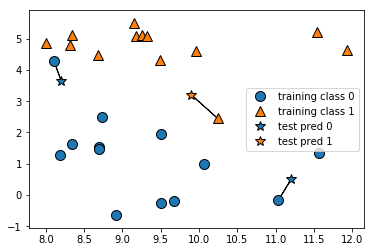

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [17]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
print("Прогнозы на тестовом наборе:", clf.predict(X_test)) 
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]
Правильность на тестовом наборе: 0.86


[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0] 26


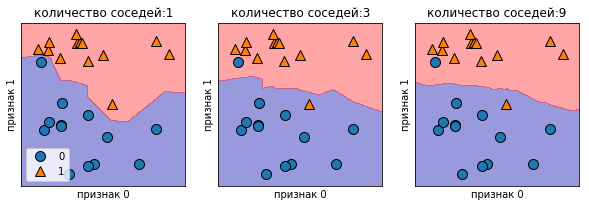

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3)) 

for n_neighbors, ax in zip([1, 3, 9], axes): 
    # создаем объект-классификатор и подгоняем в одной строке 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("количество соседей:{}".format(n_neighbors)) 
    ax.set_xlabel("признак 0") 
    ax.set_ylabel("признак 1") 

axes[0].legend(loc=3) 

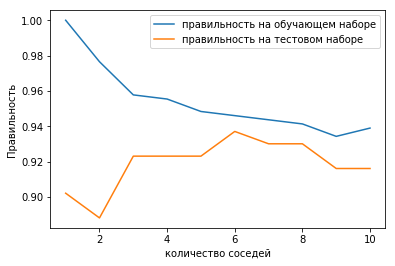

In [35]:
from sklearn.datasets import load_breast_cancer 
 
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split( 
    cancer.data, cancer.target, stratify=cancer.target, random_state=66) 
 
training_accuracy = [] 
test_accuracy = [] 
# пробуем n_neighbors от 1 до 10 
neighbors_settings = range(1, 11) 
 
for n_neighbors in neighbors_settings: 
    # строим модель 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train) 
    # записываем правильность на обучающем наборе 
    training_accuracy.append(clf.score(X_train, y_train)) 
    # записываем правильность на тестовом наборе 
    test_accuracy.append(clf.score(X_test, y_test)) 

plt.plot(neighbors_settings, training_accuracy, label='правильность на обучающем наборе') 
plt.plot(neighbors_settings, test_accuracy, label='правильность на тестовом наборе') 
plt.ylabel('Правильность') 
plt.xlabel('количество соседей') 
plt.legend()

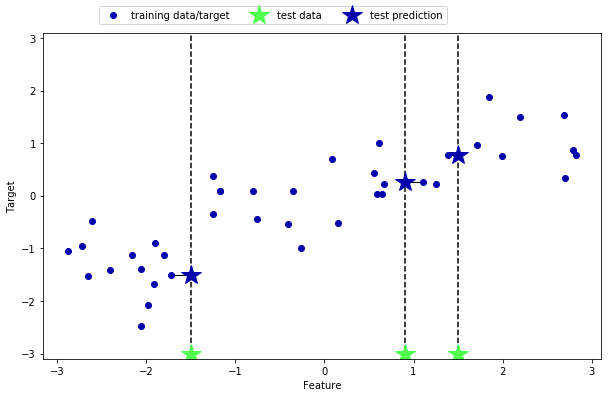

In [36]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

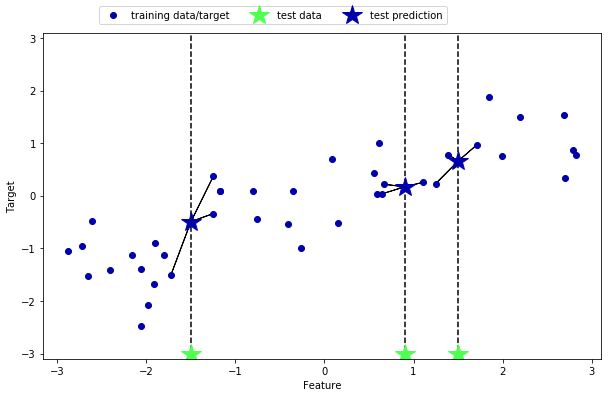

In [37]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [39]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# создаем экземпляр модели и устанавливаем количество соседей равным 3
reg = KNeighborsRegressor(n_neighbors=3)
# подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [41]:
print("Прогнозы для тестового набора:\n{}".format(reg.predict(X_test)))
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test))) 

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
R^2 на тестовом наборе: 0.83


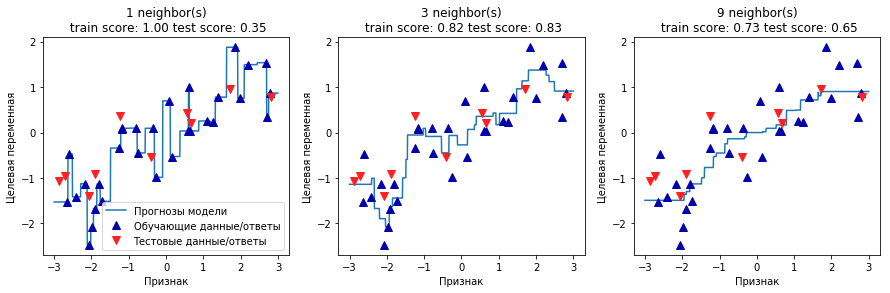

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # получаем прогнозы, используя 1, 3, и 9 соседей
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")

axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
                "Тестовые данные/ответы"], loc="best")

w[0]: 0.393906  b: -0.031804


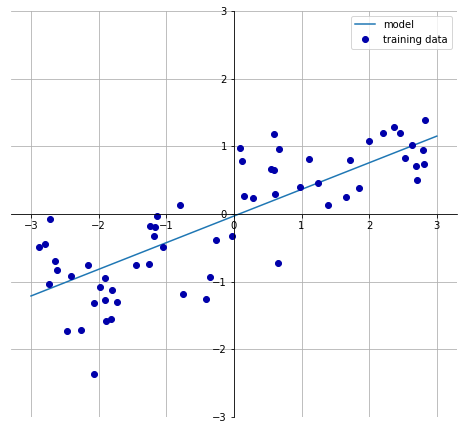

In [43]:
mglearn.plots.plot_linear_regression_wave()

In [44]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [46]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
